In [1]:
import json
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib 
import os
from scipy.special import softmax
from post_process_numpy import peaks_detect,association

In [3]:
ra_map = np.load(2019-09-16-12-52-12_000167_ra.npy)
rd_map = np.load(r'2019-09-16-12-52-12_000167_rd.npy')
ad_map = np.load(r'2019-09-16-12-52-12_000167.npy')

FileNotFoundError: [Errno 2] No such file or directory: '2019-09-16-12-52-12_000167_ra.npy'

In [5]:
preds = torch.Tensor([[1,2],[2,3]])
target = torch.ones((2,2))
loss_fn =nn.MSELoss(reduction='sum')
loss = loss_fn(preds,target)
print(loss)

tensor(6.)


In [ ]:
annotation_dir = os.path.join(dataset_dir,seq_name,'annotations','box','range_angle_light.json')
fp = open(annotation_dir,'r')
data_anno = json.load(fp)
#print(annotation_dir)

In [2]:
#preds_batch = np.load(r'saved_images\0_preds.npy')
frame = 0

grd_truth = np.load(f"saved_output\{frame}_grdTruth.npy")
input_map = np.load(f"saved_output\{frame}_input.npy")
preds = np.load(f"saved_output\{frame}_preds.npy")


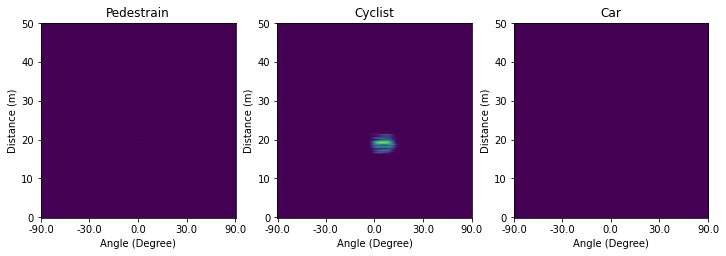

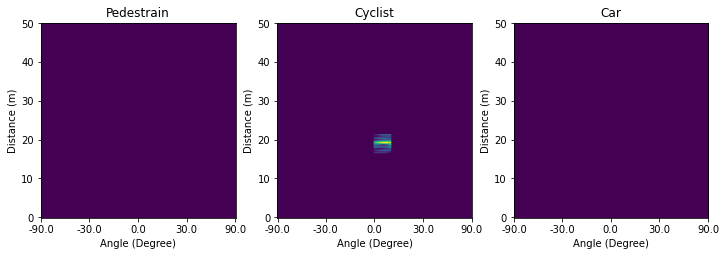

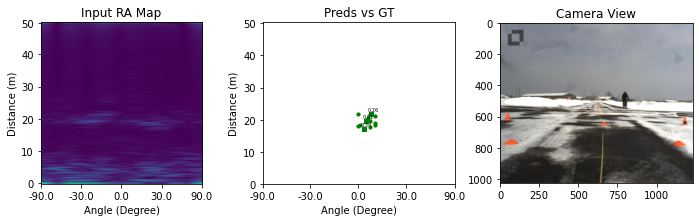

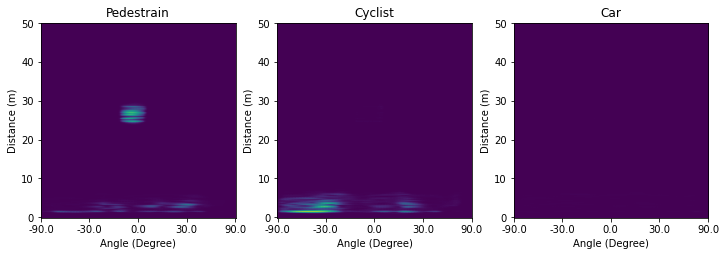

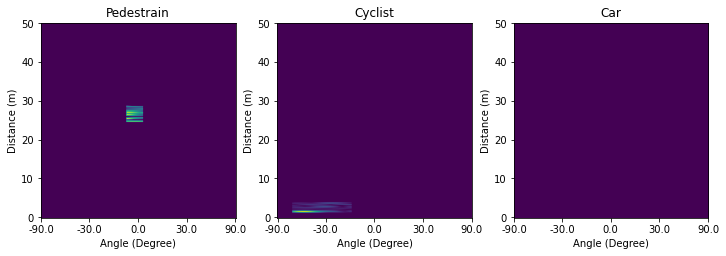

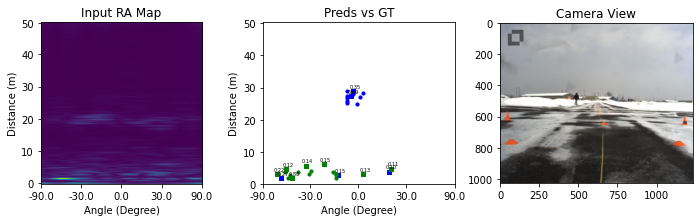

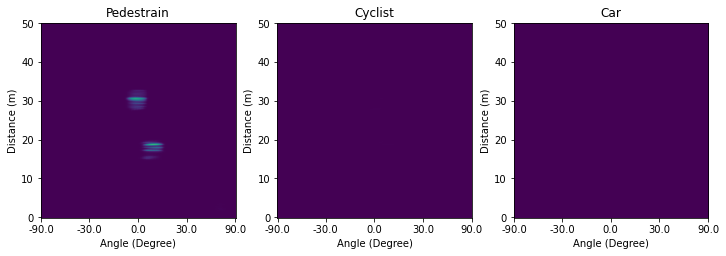

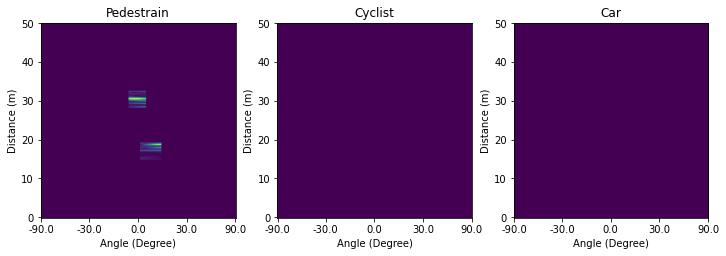

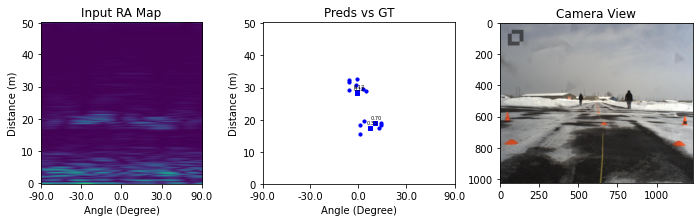

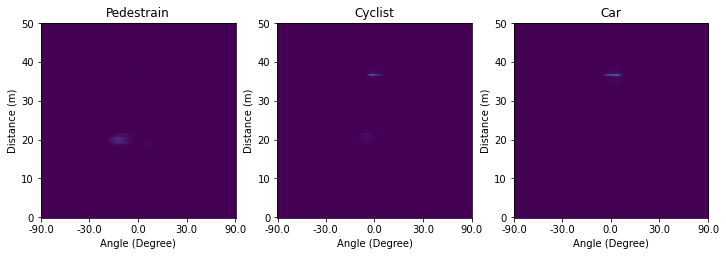

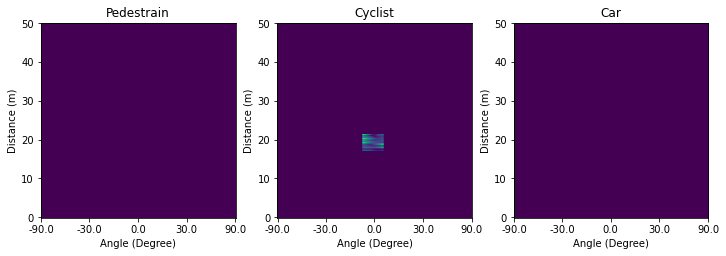

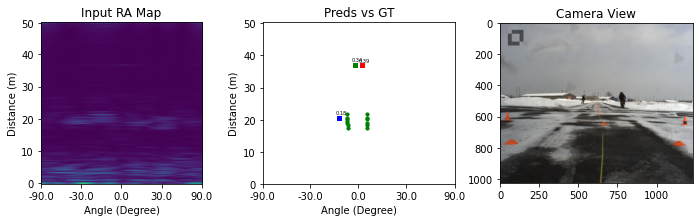

In [3]:
for idx in range(preds.shape[0]):
    pred_map = np.copy(preds[idx,:,:,:])

    ra_size = pred_map.shape[1:]
    fig, ax  = plt.subplots(1,3,figsize = (10,10))
    #plt.title('Predictions')
    #plt.suptitle('Predictions')
    fig.tight_layout()
    title = ['Pedestrain','Cyclist', 'Car']
    for chn in range(pred_map.shape[0]):
        ax[chn].imshow(pred_map[chn,:,:],cmap='viridis',vmin = 0,vmax =1)
        ax[chn].title.set_text(title[chn])
        ax[chn].set_xticks([0, ra_size[1]*1/4-1,ra_size[1]*2/4-1,ra_size[1]*3/4-1,ra_size[1]-1])
        ax[chn].set_yticks([0,ra_size[1]*1/5-1,ra_size[1]*2/5-1,ra_size[1]*3/5-1, ra_size[1]*4/5-1,ra_size[1]-1])
        ax[chn].set_yticklabels([50, 40, 30, 20, 10, 0])
        ax[chn].set_xticklabels(np.round(np.rad2deg(np.arcsin(np.linspace(-1,1,5))),1))
        ax[chn].set_ylabel('Distance (m)')
        ax[chn].set_xlabel('Angle (Degree)')
    
    fig, ax  = plt.subplots(1,3,figsize = (10,10))
    #fig.suptitle('Groundtruth')
    fig.tight_layout()

    grd_map = np.copy(grd_truth[idx,:,:,:])

    for chn in range(grd_map.shape[0]):
        ax[chn].imshow(grd_map[chn,:,:],cmap='viridis',vmin = 0,vmax =1)
        ax[chn].title.set_text(title[chn])
        ax[chn].set_xticks([0, ra_size[1]*1/4-1,ra_size[1]*2/4-1,ra_size[1]*3/4-1,ra_size[1]-1])
        ax[chn].set_yticks([0,ra_size[1]*1/5-1,ra_size[1]*2/5-1,ra_size[1]*3/5-1, ra_size[1]*4/5-1,ra_size[1]-1])
        ax[chn].set_yticklabels([50, 40, 30, 20, 10, 0])
        ax[chn].set_xticklabels(np.round(np.rad2deg(np.arcsin(np.linspace(-1,1,5))),1))
        ax[chn].set_ylabel('Distance (m)')
        ax[chn].set_xlabel('Angle (Degree)')  

    cord = dict()
    cord['Pred'] ={'0':[],'1':[],'2':[]}
    cord['GT'] ={'0':[],'1':[],'2':[]}



    fig, ax  = plt.subplots(1,3,figsize = (10,3))
    ax[0].title.set_text('Input RA Map')
    ax[1].title.set_text('Preds vs GT')
    ax[2].title.set_text('Camera View')
    ax[1].set_xlim(0,input_map.shape[2])
    ax[1].set_ylim(0,input_map.shape[3])

    fig.tight_layout()
    ax[0].imshow(input_map[idx,0,:,:])
    ax[2].imshow(mpimg.imread(f"saved_output\{frame}_{idx}.jpg"))
    for i in range(2):
        ax[i].set_xticks([0, ra_size[1]*1/4-1,ra_size[1]*2/4-1,ra_size[1]*3/4-1,ra_size[1]-1])
        ax[i].set_yticks([0,ra_size[1]*1/5-1,ra_size[1]*2/5-1,ra_size[1]*3/5-1, ra_size[1]*4/5-1,ra_size[1]-1])
        ax[i].set_yticklabels([50, 40, 30, 20, 10, 0])
        ax[i].set_xticklabels(np.round(np.rad2deg(np.arcsin(np.linspace(-1,1,5))),1))
        ax[i].set_ylabel('Distance (m)')
        ax[i].set_xlabel('Angle (Degree)') 
    color = ['blue','green','red']
    ax[1].set_yticklabels([0,10,20,30,40,50])
    for chn in range(pred_map.shape[0]):
        pred_row,pred_col,pred_intensity=peaks_detect(pred_map[chn,:,:])
        pred_row,pred_col,pred_intent= association(pred_row,pred_col,pred_intensity)
        grd_row,grd_col,grd_intent=peaks_detect(grd_map[chn,:,:])
        if pred_row:
            for points in zip(pred_row,pred_col,pred_intent):
                cord['Pred'][f"{chn}"].append(points)
                row , col ,intent= np.array(points) 
                ax[1].scatter(col, 256-row, s=10, c=color[chn],marker="s")
                ax[1].text(col -5, 256-row+5, "%.2f" % intent, color='black', fontsize=5)

        if grd_row:           
            for points in zip(grd_row,grd_col,grd_intent):
                cord['GT'][f"{chn}"].append(points)
                row , col ,_= np.array(points) 
                ax[1].scatter(col, 256-row, s=10, c=color[chn],marker="o")
    #ax[1].set_facecolor('black')
    #ax[1].legend((marker='s', marker ='o'),('Pred','GT'))


In [137]:
print(np.rad2deg(np.arcsin(np.linspace(-1,1,5))))

[-90. -30.   0.  30.  90.]


In [31]:
color = ['white','Red', 'blue']
color[1]

'Red'

In [ ]:
test = np.array ([[1,2,3,4,5],[5,6,7,8,9]])
index = np.asarray(np.where(test==5))
print(index)
np.take_along_axis(test,index,)

In [ ]:
x_min,y_min = co_ordinate[0]
x_max,y_max = co_ordinate[1]
print(x_max,y_max)

In [ ]:
print(os.path.join(dataset_dir,seq_name,'camera_images','000117.png'))

In [ ]:
img = matplotlib.image.imread(os.path.join(dataset_dir,seq_name,'camera_images','000117.jpg'))
figure, ax = plt.subplots(1)

In [ ]:
plt.imshow(np.load(os.path.join(dataset_dir,seq_name,'range_angle_numpy','000117.npy')))

In [ ]:
mat = np.load(os.path.join(dataset_dir,seq_name,'annotations','dense',frame_name,'range_angle.npy'))
fig,ax = plt.subplots(1,4, figsize = (12,3))
ax[0].imshow(mat[0,:,:])
ax[0].title.set_text("Background")
ax[1].imshow(mat[1,:,:])
ax[1].title.set_text("Pedestrian")
ax[2].imshow(mat[2,:,:])
ax[2].title.set_text("Cyclist")
ax[3].imshow(mat[3,:,:])
ax[3].title.set_text("Car")